In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from helper import fig_path

sns.set_theme(context="paper", style="darkgrid", rc={"axes.facecolor": "0.96"})
fontsize = "x-large"
params = {
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": fontsize,
    "axes.titlesize": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "figure.titlesize": fontsize,
    "legend.handlelength": 2,
}
plt.rcParams.update(params)

In [2]:
betas = [0.5, 1, 2]
latent_dims = [2, 10, 20]

mses_2 = []
mses_10 = []
mses_20 = []
klds_2 = []
klds_10 = []
klds_20 = []

for beta in betas:
    df_2 = pd.read_csv(f"./vae_data/hh_beta_{beta}_z_2_conv_vae.csv")
    df_10 = pd.read_csv(f"./vae_data/hh_beta_{beta}_z_10_conv_vae.csv")
    df_20 = pd.read_csv(f"./vae_data/hh_beta_{beta}_z_20_conv_vae.csv")

    mses_2.append(df_2["mse"].iloc[-1])
    klds_2.append(df_2["kld"].iloc[-1])
    mses_10.append(df_10["mse"].iloc[-1])
    klds_10.append(df_10["kld"].iloc[-1])
    mses_20.append(df_20["mse"].iloc[-1])
    klds_20.append(df_20["kld"].iloc[-1])

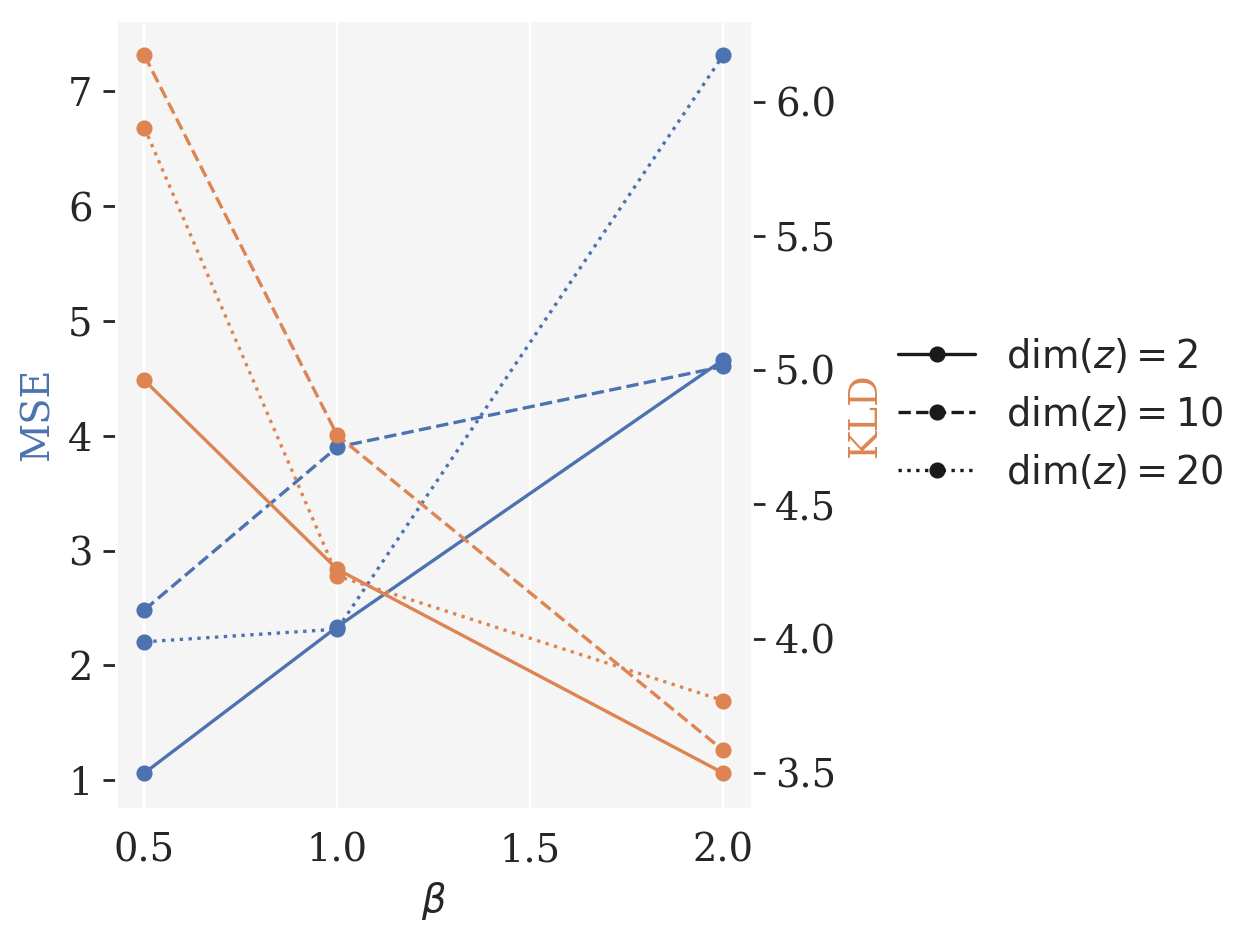

In [12]:
fig, ax1 = plt.subplots(tight_layout=True)
ax2 = ax1.twinx()
ax1.plot(betas, mses_2, "C0o-")
ax1.plot([], [], "ko-", label=r"$\dim(z)=2$")
ax2.plot(betas, klds_2, "C1o-")

ax1.plot(betas, mses_10, "C0o--")
ax1.plot([], [], "ko--", label=r"$\dim(z)=10$")
ax2.plot(betas, klds_10, "C1o--")

ax1.plot(betas, mses_20, "C0o:")
ax1.plot([], [], "ko:", label=r"$\dim(z)=20$")
ax2.plot(betas, klds_20, "C1o:")

ax1.set_xlabel(r"$\beta$")
ax1.set_ylabel("MSE", color="C0")
ax2.set_ylabel("KLD", color="C1")
ax1.legend()

ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles,
    labels,
    loc="center left",
    bbox_to_anchor=(1.2, 0.5),
    fancybox=True,
    borderaxespad=0.1,
    ncol=1,
    frameon=False,
)

fig.savefig(fig_path("hh_mse_kld_vs_beta_conv_vae.pdf"), bbox_inches="tight")

In [13]:
latent_dims = [2, 10, 20]

df_b0 = []
df_b1 = []
df_b2 = []

for latent_dim in latent_dims:
    df_b0_i = pd.read_csv(f"./vae_data/hh_beta_0.5_z_{latent_dim}_conv_vae.csv")
    df_b1_i = pd.read_csv(f"./vae_data/hh_beta_1_z_{latent_dim}_conv_vae.csv")
    df_b2_i = pd.read_csv(f"./vae_data/hh_beta_2_z_{latent_dim}_conv_vae.csv")
    df_b0_i["latent_dim"] = latent_dim
    df_b1_i["latent_dim"] = latent_dim
    df_b2_i["latent_dim"] = latent_dim
    df_b0.append(df_b0_i)
    df_b1.append(df_b1_i)
    df_b2.append(df_b2_i)

df_b0 = pd.concat(df_b0, ignore_index=True)
df_b1 = pd.concat(df_b1, ignore_index=True)
df_b2 = pd.concat(df_b2, ignore_index=True)

In [14]:
df_b0

,elbo,kld,mse,epoch,latent_dim
0,39.187424,7.367270,35.503788,1,2
1,14.003422,6.690177,10.658333,2,2
2,13.644274,6.671735,10.308406,3,2
3,8.792203,6.801798,5.391304,4,2
4,14.268190,6.818341,10.859020,5,2
...,...,...,...,...,...
295,5.115931,6.300038,1.965911,96,20
296,5.090741,6.161461,2.010010,97,20
297,5.082438,6.237872,1.963502,98,20
298,5.141186,5.955042,2.163664,99,20


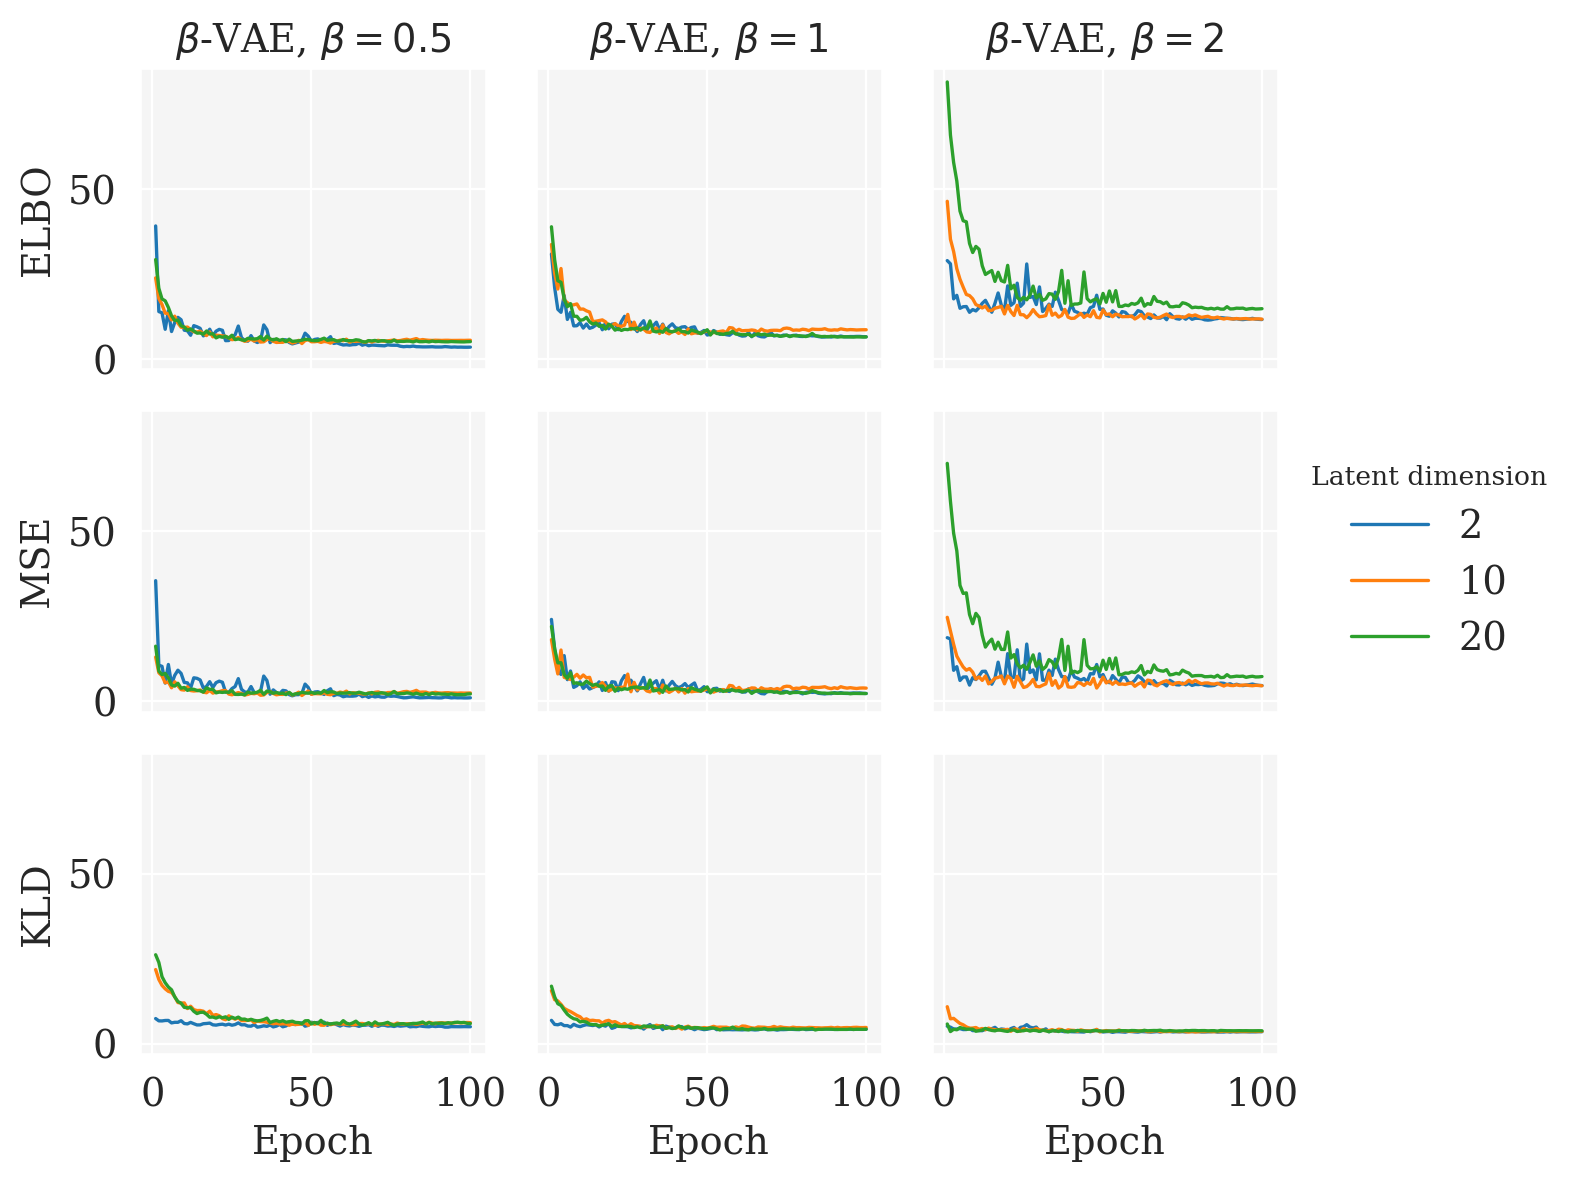

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 6), tight_layout=True)

sns.lineplot(data=df_b0, x="epoch", y="elbo", hue="latent_dim", palette="tab10", ax=axes[0, 0])
axes[0, 0].set(title=r"$\beta$-VAE, $\beta=0.5$", xlabel="Epoch", ylabel="ELBO")

sns.lineplot(data=df_b1, x="epoch", y="elbo", hue="latent_dim", palette="tab10", ax=axes[0, 1])
axes[0, 1].set(title=r"$\beta$-VAE, $\beta=1$", xlabel="Epoch", ylabel="ELBO")

sns.lineplot(data=df_b2, x="epoch", y="elbo", hue="latent_dim", palette="tab10", ax=axes[0, 2])
axes[0, 2].set(title=r"$\beta$-VAE, $\beta=2$", xlabel="Epoch", ylabel="ELBO")

sns.lineplot(data=df_b0, x="epoch", y="mse", hue="latent_dim", palette="tab10", ax=axes[1, 0])
axes[1, 0].set(xlabel="Epoch", ylabel="MSE")
sns.lineplot(data=df_b1, x="epoch", y="mse", hue="latent_dim", palette="tab10", ax=axes[1, 1])
axes[1, 1].set(xlabel="Epoch", ylabel="MSE")
sns.lineplot(data=df_b2, x="epoch", y="mse", hue="latent_dim", palette="tab10", ax=axes[1, 2])
axes[1, 2].set(xlabel="Epoch", ylabel="MSE")

sns.lineplot(data=df_b0, x="epoch", y="kld", hue="latent_dim", palette="tab10", ax=axes[2, 0])
axes[2, 0].set(xlabel="Epoch", ylabel="KLD")
sns.lineplot(data=df_b1, x="epoch", y="kld", hue="latent_dim", palette="tab10", ax=axes[2, 1])
axes[2, 1].set(xlabel="Epoch", ylabel="KLD")
sns.lineplot(data=df_b2, x="epoch", y="kld", hue="latent_dim", palette="tab10", ax=axes[2, 2])
axes[2, 2].set(xlabel="Epoch", ylabel="KLD")

axes[0, 0].get_legend().remove()
axes[0, 1].get_legend().remove()
axes[0, 2].get_legend().remove()
axes[1, 0].get_legend().remove()
axes[1, 1].get_legend().remove()
axes[2, 0].get_legend().remove()
axes[2, 1].get_legend().remove()
axes[2, 2].get_legend().remove()
handles, labels = axes[1, 2].get_legend_handles_labels()
axes[1, 2].legend(
    handles,
    labels,
    title="Latent dimension",
    loc="center left",
    bbox_to_anchor=(1.04, 0.5),
    fancybox=True,
    borderaxespad=0.1,
    ncol=1,
    frameon=False,
)

fig.savefig(fig_path("hh_loss_latent_dim_conv_beta_vae.pdf"), bbox_inches="tight")